# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
env = UnityEnvironment(file_name="/home/arasdar/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score: {}".format(score))

(37,)
Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 2.0


In [8]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [10]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
while True: # infinite number of steps
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    #print(state, action, reward, done)
    batch.append([action, state, reward, done])
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
# print("Score: {}".format(score))

In [11]:
batch[0], batch[0][1].shape

([0, array([1.        , 0.        , 0.        , 0.        , 0.51611114,
         0.        , 0.        , 1.        , 0.        , 0.0317829 ,
         1.        , 0.        , 0.        , 0.        , 0.26613271,
         0.        , 0.        , 1.        , 0.        , 0.04329015,
         1.        , 0.        , 0.        , 0.        , 0.78930956,
         0.        , 0.        , 1.        , 0.        , 0.03335776,
         0.        , 0.        , 1.        , 0.        , 0.0343007 ,
         0.        , 0.        ]), 0.0, False], (37,))

In [12]:
batch[0][1].shape

(37,)

In [13]:
batch[0]

[0, array([1.        , 0.        , 0.        , 0.        , 0.51611114,
        0.        , 0.        , 1.        , 0.        , 0.0317829 ,
        1.        , 0.        , 0.        , 0.        , 0.26613271,
        0.        , 0.        , 1.        , 0.        , 0.04329015,
        1.        , 0.        , 0.        , 0.        , 0.78930956,
        0.        , 0.        , 1.        , 0.        , 0.03335776,
        0.        , 0.        , 1.        , 0.        , 0.0343007 ,
        0.        , 0.        ]), 0.0, False]

In [14]:
actions = np.array([each[0] for each in batch])
states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [15]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300,) (300, 37) (300,) (300,)
float64 float64 int64 bool
3 0 4
0.0 0.0
10.786504745483398 -11.326789855957031


In [16]:
# Data of the model
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    reward = tf.placeholder(tf.float32, [], name='reward')
    return states, actions, targetQs, reward

In [17]:
# Generator/Controller: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)

        # return actions logits
        return logits

In [18]:
# Discriminator/Dopamine: Reward function/planner/naviator/advisor/supervisor/cortical columns
def discriminator(states, actions, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('discriminator', reuse=reuse):
        # Fusion/merge states and actions/ SA/ SM
        x_fused = tf.concat(axis=1, values=[states, actions])
        
        # First fully connected layer
        h1 = tf.layers.dense(inputs=x_fused, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=1)        
        #predictions = tf.nn.softmax(logits)

        # return rewards logits
        return logits

In [19]:
def model_loss(action_size, hidden_size, states, actions, targetQs, reward):
    # G
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    neg_log_prob_actions = tf.nn.softmax_cross_entropy_with_logits_v2(logits=actions_logits, 
                                                                      labels=actions_labels)
    g_loss = tf.reduce_mean(neg_log_prob_actions[:-1] * targetQs[1:])
    
    # D
    Qs_logits = discriminator(actions=actions_logits, hidden_size=hidden_size, states=states)
    rewards = reward*tf.ones_like(Qs_logits)
    d_lossR = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Qs_logits,
                                                                     labels=tf.nn.sigmoid(rewards)))
    targetQs = tf.reshape(targetQs, shape=[-1, 1])
    d_lossQ = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Qs_logits[:-1],
                                                                     labels=tf.nn.sigmoid(targetQs[1:])))
    d_loss = d_lossR + d_lossQ

    return actions_logits, Qs_logits, g_loss, d_loss, d_lossR, d_lossQ, tf.nn.sigmoid(reward)

In [20]:
# Optimizating/training/learning G & D
def model_opt(g_loss, d_loss, learning_rate):
    """
    Get optimization operations in order
    :param g_loss: Generator loss Tensor for action prediction
    :param d_loss: Discriminator loss Tensor for reward prediction for generated/prob/logits action
    :param learning_rate: Learning Rate Placeholder
    :return: A tuple of (qfunction training, generator training, discriminator training)
    """
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        g_opt = tf.train.AdamOptimizer(learning_rate).minimize(g_loss, var_list=g_vars)
        d_opt = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)

    return g_opt, d_opt

In [22]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs, self.reward = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.Qs_logits, self.g_loss, self.d_loss, self.d_lossR, self.d_lossQ, self.sigm_reward = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, # model input
            targetQs=self.targetQs, reward=self.reward) # model input
        
        # Update the model: backward pass and backprop
        self.g_opt, self.d_opt = model_opt(g_loss=self.g_loss, d_loss=self.d_loss, learning_rate=learning_rate)

In [23]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:{}'.format(np.max(actions) - np.min(actions)+1))

state size:(300, 37) actions:(300,)
action size:4


In [24]:
# Training parameters
# Network parameters
state_size = 37              # number of units for the input state/observation -- simulation
action_size = 4              # number of units for the output actions -- simulation
hidden_size = 37*16          # number of units in each Q-network hidden layer -- simulation
learning_rate = 0.001          # learning rate for adam

In [25]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

In [26]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment

while True: # infinite number of steps
#for _ in range(batch_size):
    state = env_info.vector_observations[0]   # get the next state
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    #memory.buffer.append([action, state, done])
    if done:                                       # exit loop if episode finished
        break

In [ ]:
from collections import deque
episodes_total_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
saver = tf.train.Saver()
rewards_list, g_loss_list, d_loss_list = [], [], []
d_lossR_list, d_lossQ_list = [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Training episodes/epochs
    for ep in range(111111):
        batch = [] # every data batch
        total_reward = 0
        #state = env.reset() # env first state
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment

        # Training steps/batches
        while True:
            state = env_info.vector_observations[0]   # get the next state
            action_logits, Q_logits = sess.run(fetches=[model.actions_logits, model.Qs_logits], 
                                               feed_dict={model.states: np.reshape(state, [1, -1])})
            action = np.argmax(action_logits)
            batch.append([state, action, Q_logits])
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done is True: # episode ended success/failure
                episodes_total_reward.append(total_reward) # stopping criteria
                #rate = total_reward/ 500 # success is 500 points
                rate = total_reward/ +13 # success is 13; it can be neg and pos
                break

        # Training using batches
        #batch = memory.buffer
        states = np.array([each[0] for each in batch])
        actions = np.array([each[1] for each in batch])
        targetQs = np.array([each[2] for each in batch])
        g_loss, d_loss, d_lossR, d_lossQ, sigm_reward, _, _ = sess.run([model.g_loss, model.d_loss,
                                                                        model.d_lossR, model.d_lossQ, 
                                                                        model.sigm_reward,
                                                                        model.g_opt, model.d_opt],
                                                                       feed_dict = {model.states: states, 
                                                                                    model.actions: actions,
                                                                                    model.reward: rate,
                                                                    model.targetQs: targetQs.reshape([-1])})
        # Average 100 episode total reward
        # Print out
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episodes_total_reward)),
              'rate:{:.4f}'.format(sigm_reward),
              'gloss:{:.4f}'.format(g_loss),
              'dloss:{:.4f}'.format(d_loss),
              'dlossR:{:.4f}'.format(d_lossR),
              'dlossQ:{:.4f}'.format(d_lossQ))
        # Ploting out
        rewards_list.append([ep, np.mean(episodes_total_reward)])
        g_loss_list.append([ep, g_loss])
        d_loss_list.append([ep, d_loss])
        d_lossR_list.append([ep, d_lossR])
        d_lossQ_list.append([ep, d_lossQ])
        # Break episode/epoch loop
        if np.mean(episodes_total_reward) >= +13:
            #break
            print('Won!')
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints-nav/model.ckpt')

Episode:0 meanR:0.0000 rate:0.5000 gloss:-0.1643 dloss:1.3900 dlossR:0.6963 dlossQ:0.6937
Episode:1 meanR:1.0000 rate:0.5384 gloss:0.6558 dloss:1.4638 dlossR:0.9769 dlossQ:0.4869
Episode:2 meanR:0.6667 rate:0.5000 gloss:-0.1522 dloss:1.3866 dlossR:0.6951 dlossQ:0.6915
Episode:3 meanR:0.7500 rate:0.5192 gloss:-0.1091 dloss:1.4126 dlossR:0.8106 dlossQ:0.6021
Episode:4 meanR:0.8000 rate:0.5192 gloss:-0.0463 dloss:1.3883 dlossR:0.6975 dlossQ:0.6908
Episode:5 meanR:0.3333 rate:0.4616 gloss:0.1659 dloss:1.3941 dlossR:0.7086 dlossQ:0.6856
Episode:6 meanR:0.2857 rate:0.5000 gloss:0.1122 dloss:1.3898 dlossR:0.7114 dlossQ:0.6785
Episode:7 meanR:0.5000 rate:0.5384 gloss:-0.0026 dloss:1.3870 dlossR:0.7326 dlossQ:0.6544
Episode:8 meanR:0.4444 rate:0.5000 gloss:0.0248 dloss:1.3892 dlossR:0.7079 dlossQ:0.6814
Episode:9 meanR:0.3000 rate:0.4808 gloss:-0.0439 dloss:1.3920 dlossR:0.7224 dlossQ:0.6696
Episode:10 meanR:0.3636 rate:0.5192 gloss:-0.0138 dloss:1.3869 dlossR:0.6941 dlossQ:0.6927
Episode:11 me

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0,0.5,'Total rewards')

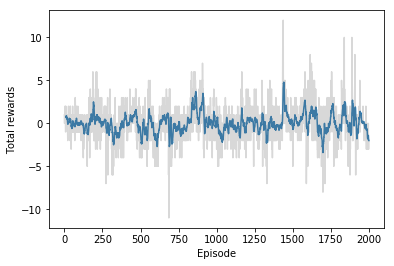

In [44]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Average losses')

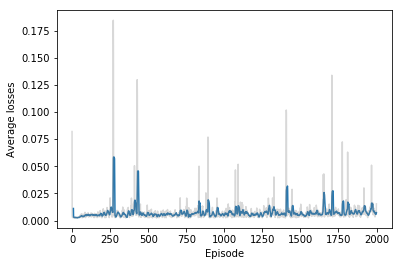

In [45]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [33]:
# # import gym
# # # env = gym.make('CartPole-v0')
# # env = gym.make('CartPole-v1')
# # # env = gym.make('Acrobot-v1')
# # # env = gym.make('MountainCar-v0')
# # # env = gym.make('Pendulum-v0')
# # # env = gym.make('Blackjack-v0')
# # # env = gym.make('FrozenLake-v0')
# # # env = gym.make('AirRaid-ram-v0')
# # # env = gym.make('AirRaid-v0')
# # # env = gym.make('BipedalWalker-v2')
# # # env = gym.make('Copy-v0')
# # # env = gym.make('CarRacing-v0')
# # # env = gym.make('Ant-v2') #mujoco
# # # env = gym.make('FetchPickAndPlace-v1') # mujoco required!

# with tf.Session() as sess:
#     #sess.run(tf.global_variables_initializer())
#     saver.restore(sess, 'checkpoints/model-nav.ckpt')    
#     #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
#     # Episodes/epochs
#     for _ in range(1):
#         state = env.reset()
#         total_reward = 0

#         # Steps/batches
#         #for _ in range(111111111111111111):
#         while True:
#             env.render()
#             action_logits = sess.run(model.actions_logits, feed_dict={model.states: np.reshape(state, [1, -1])})
#             action = np.argmax(action_logits)
#             state, reward, done, _ = env.step(action)
#             total_reward += reward
#             if done:
#                 break
                
#         # Closing the env
#         print('total_reward: {:.2f}'.format(total_reward))
#         env.close()